<h1 align="center">Classification of ECOLI - UCI ML Archive</h1>

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'

data_df = pd.read_csv(url, header=None, delim_whitespace=True)

**Attribute Information**

  1.  Sequence Name: Accession number for the SWISS-PROT database
  2.  mcg: McGeoch's method for signal sequence recognition.
  3.  gvh: von Heijne's method for signal sequence recognition.
  4.  lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
  5.  chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
  6.  aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
  7. alm1: score of the ALOM membrane spanning region prediction program.
  8. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

In [3]:
columns = ['seq_name', 'mcg', 'gvh', 'lip','chg', 'aac', 'alm1', 'alm2', 'type']

In [4]:
data_df.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [5]:
data_df.columns = columns

In [6]:
data_df.head()

,seq_name,mcg,gvh,lip,chg,aac,alm1,alm2,type
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


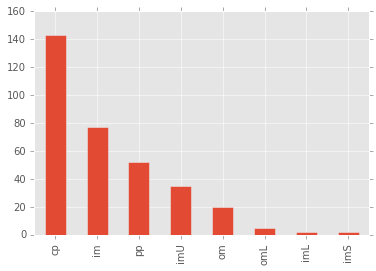

In [7]:
data_df['type'].value_counts().plot(kind='bar')

In [8]:
from sklearn.feature_selection import f_classif, chi2

f_test_statistic, f_p_val = f_classif(data_df.drop(['seq_name', 'type'], axis=1), data_df['type'])

In [9]:
f_test_series = pd.Series(f_test_statistic, index=[c for c  in data_df.columns if c not in ['seq_name', 'type']])

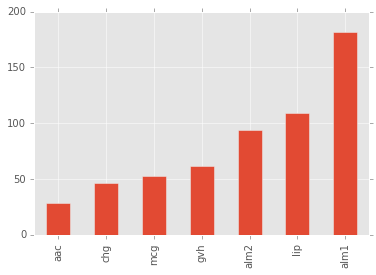

In [10]:
f_test_series.sort_values(ascending=True).plot(kind='bar')

In [11]:
f_test_p_vals = pd.Series(f_p_val, index=[c for c in data_df.columns if c not in ['seq_name', 'type']])
f_test_p_vals.sort_values(ascending=True)

alm1    1.026237e-108
lip      6.842695e-82
alm2     2.364261e-74
gvh      2.652127e-56
mcg      8.304073e-50
chg      1.321999e-45
aac      2.762051e-30
dtype: float64

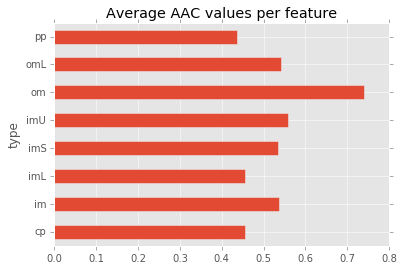

In [12]:
avg_aac = data_df.groupby(by='type')['aac'].describe().loc[:, 'mean', :]
avg_aac.plot(kind='barh', title='Average AAC values per feature')

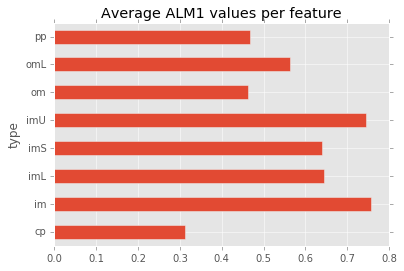

In [13]:
avg_alm1 = data_df.groupby(by='type')['alm1'].describe().loc[:, 'mean', :]
avg_alm1.plot(kind='barh', title='Average ALM1 values per feature')

In [21]:
# pd.crosstab(data_df['seq_name'], data_df['type'])

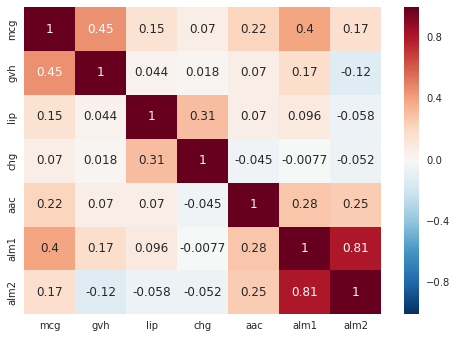

In [15]:
import seaborn as sns
corrs = data_df.drop(['type', 'seq_name'], axis=1).corr()

sns.heatmap(corrs, annot=True)

In [16]:
# Oversample the feature counts
feature_counts = data_df['type'].value_counts()
max_counts = feature_counts.max()

max_counts

143

In [17]:
unique_labels = feature_counts.index

indexed_by_labels = data_df.set_index('type')
sampled = [indexed_by_labels.loc[label].sample(max_counts, replace=True) for label in unique_labels]
oversampled_data_df = pd.concat(sampled, axis=0).reset_index()

In [18]:
oversampled_data_df.head()

,type,seq_name,mcg,gvh,lip,chg,aac,alm1,alm2
0,cp,NIRD_ECOLI,0.44,0.42,0.48,0.5,0.42,0.25,0.20
1,cp,XYLA_ECOLI,0.16,0.43,0.48,0.5,0.54,0.27,0.37
2,cp,PHOB_ECOLI,0.41,0.43,0.48,0.5,0.45,0.31,0.41
3,cp,GLNA_ECOLI,0.28,0.38,0.48,0.5,0.50,0.33,0.42
4,cp,ASG1_ECOLI,0.42,0.24,0.48,0.5,0.57,0.27,0.37


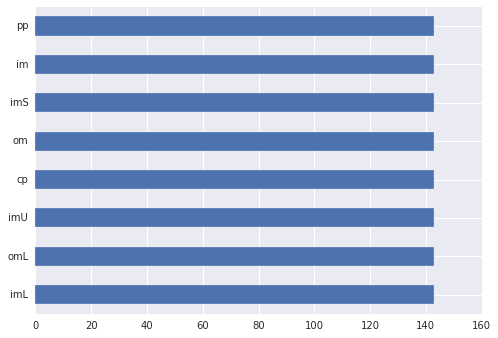

In [19]:
oversampled_data_df['type'].value_counts().plot(kind='barh')

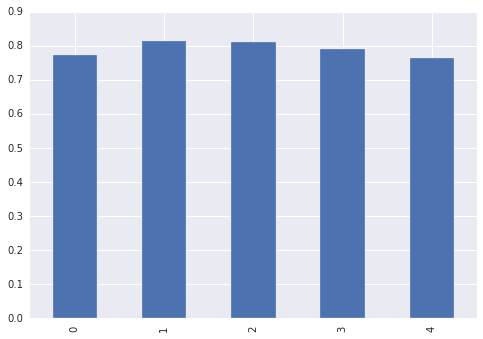

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

estimator = GaussianNB()
features = oversampled_data_df.drop(['type', 'seq_name'], axis=1)
labels = oversampled_data_df['type']
fold = StratifiedKFold(n_splits=5, shuffle=True)

scores = cross_val_score(estimator, features, labels, cv=fold)

pd.Series(scores).plot(kind='bar')